In [2]:
! pip install pandas numpy seaborn matplotlib scikit-learn imblearn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE

In [4]:
pd.set_option('display.max_columns', None)
hist_churn_df = pd.read_csv('../base_hist_churn.csv')
clientes_df = pd.read_csv('../base_clientes.csv')
churn_df = pd.read_csv('../base_hist_churn.csv')
precos_df = pd.read_csv('../base_precos.csv')
primitiva_df = pd.merge(clientes_df, precos_df, on='id')

display(clientes_df)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,NaN,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,06/09/2017,06/09/2022,NaN,27/08/2021,07/09/2021,NaN,NaN,NaN,NaN,4001.08,3215,0.0,130.43,0.114603,0.098261,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,13/12/2016,31/12/2022,NaN,13/12/2016,01/01/2022,NaN,NaN,NaN,NaN,518.22,563,0.0,23.20,0.142174,0.000000,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,04/09/2016,04/09/2022,NaN,27/08/2021,05/09/2021,NaN,NaN,NaN,NaN,639.65,399,0.0,130.32,0.115182,0.098841,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321
3,cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,NaN,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,03/01/2017,03/01/2023,NaN,03/01/2017,04/01/2022,NaN,NaN,NaN,NaN,2634.23,738,0.0,16.42,0.164058,0.086163,44.311378,f,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951
4,c7c8ee9daf2a864d159d45a2373ada72,NaN,NaN,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,07/10/2017,07/10/2022,NaN,27/08/2021,09/10/2021,NaN,NaN,NaN,NaN,2801.47,0,0.0,0.00,0.141434,0.000000,44.311378,f,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,24/05/2018,08/05/2022,NaN,08/05/2021,26/05/2020,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
20116,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,27/08/2018,27/08/2022,27/08/2018,27/08/2018,28/08/2021,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
20117,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,08/02/2018,07/02/2022,NaN,08/02/2018,09/02/2021,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
20118,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,30/08/2018,30/08/2022,NaN,30/08/2018,31/08/2021,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [5]:
clientes_df.describe()
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20120 entries, 0 to 20119
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20120 non-null  object 
 1   activity_new              8221 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             14846 non-null  object 
 4   cons_12m                  20120 non-null  int64  
 5   cons_gas_12m              20120 non-null  int64  
 6   cons_last_month           20120 non-null  int64  
 7   date_activ                20120 non-null  object 
 8   date_end                  20118 non-null  object 
 9   date_first_activ          4385 non-null   object 
 10  date_modif_prod           19918 non-null  object 
 11  date_renewal              20076 non-null  object 
 12  forecast_base_bill_ele    4385 non-null   float64
 13  forecast_base_bill_year   4385 non-null   float64
 14  foreca

In [6]:
precos_df = precos_df.dropna()
precos_df = precos_df.drop('price_date', axis=1)

# Calcular a média das colunas de preços agrupadas somente por 'id'
precos_df = precos_df.groupby('id').mean().reset_index()
precos_df.info()

# Exibir o DataFrame resultante
clientes_df = pd.merge(clientes_df, precos_df, on='id')
clientes_df = pd.merge(clientes_df, churn_df, on='id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20118 entries, 0 to 20117
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            20118 non-null  object 
 1   price_p1_var  20118 non-null  float64
 2   price_p2_var  20118 non-null  float64
 3   price_p3_var  20118 non-null  float64
 4   price_p1_fix  20118 non-null  float64
 5   price_p2_fix  20118 non-null  float64
 6   price_p3_fix  20118 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.1+ MB


In [7]:
# Fazer uma regressão linear das colunas forecast_base_bill_ele, forecast_base_bill_year e forecast_bill_12m através de imp_cons

columns_forecast = ['forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m']

for i in range(len(columns_forecast)):
    # Filtrar os dados para remover linhas com valores nulos na coluna "forecast_cons_year"
    data = clientes_df.dropna(subset=columns_forecast[i:i+1])

    # Separar as variáveis independentes (X) e dependente (y)
    X = data[['imp_cons']]
    y = data[[columns_forecast[i]]]

    # Inicializar o modelo de regressão linear
    model = LinearRegression()

    # Treinar o modelo
    model.fit(X, y)

    # Filtrar os dados para prever (manter) apenas linhas com valores nulos na coluna "forecast_cons_year"
    data_with_nulls = clientes_df[clientes_df[columns_forecast[i]].isnull()]

    # Verificar se há linhas para prever
    if not data_with_nulls.empty:
        # Prever os valores nulos na coluna "forecast_cons_year"
        predicted_values = model.predict(data_with_nulls[['imp_cons']])
        
        # Preencher os valores nulos na coluna "forecast_cons_year" com as previsões
        clientes_df.loc[clientes_df[columns_forecast[i]].isnull(), columns_forecast[i]] = predicted_values

# Exibir o DataFrame resultante
display(clientes_df)



,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,07/11/2018,06/11/2022,NaN,07/11/2018,09/11/2021,1194.876481,1194.876481,9429.821308,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15/06/2019,15/06/2022,NaN,NaN,23/06/2021,51.544075,51.544075,1987.251454,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.122856,0.102137,0.072579,40.640023,24.384011,16.256008,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,21/08/2015,30/08/2022,NaN,21/08/2015,31/08/2021,51.544075,51.544075,1987.251454,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149934,0.000000,0.000000,44.315416,0.000000,0.000000,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,16/04/2016,16/04/2022,NaN,16/04/2016,17/04/2021,51.544075,51.544075,1987.251454,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,30/03/2016,30/03/2022,NaN,30/03/2016,31/03/2021,51.544075,51.544075,1987.251454,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16089,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,24/05/2018,08/05/2022,NaN,08/05/2021,26/05/2020,51.544075,51.544075,1987.251454,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,0
16090,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,27/08/2018,27/08/2022,27/08/2018,27/08/2018,28/08/2021,68.640000,68.640000,1254.650000,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418,1
16091,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,08/02/2018,07/02/2022,NaN,08/02/2018,09/02/2021,76.354306,76.354306,2148.754683,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,1
16092,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,30/08/2018,30/08/2022,NaN,30/08/2018,31/08/2021,51.544075,51.544075,1987.251454,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0.149934,0.000000,0.000000,44.315416,0.000000,0.000000,0


In [8]:
drop_rows = ['date_end', 'date_modif_prod', 'date_renewal', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'origin_up', 'pow_max']

clientes_df = clientes_df.dropna(subset=drop_rows)

In [9]:
colunas_drop = ['activity_new', 'campaign_disc_ele', 'date_first_activ', 'forecast_cons', 'forecast_discount_energy']
clientes_df = clientes_df.drop(colunas_drop, axis=1)
clientes_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,07/11/2018,06/11/2022,07/11/2018,09/11/2021,1194.876481,1194.876481,9429.821308,26520.30,10025,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,0
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,21/08/2015,30/08/2022,21/08/2015,31/08/2021,51.544075,51.544075,1987.251454,189.95,0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149934,0.000000,0.000000,44.315416,0.000000,0.000000,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,16/04/2016,16/04/2022,16/04/2016,17/04/2021,51.544075,51.544075,1987.251454,47.96,0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,30/03/2016,30/03/2022,30/03/2016,31/03/2021,51.544075,51.544075,1987.251454,240.04,0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0
5,568bb38a1afd7c0fc49c77b3789b59a3,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,08/04/2016,08/04/2022,08/04/2016,12/04/2021,1399.830000,1399.830000,14559.740000,10865.02,12400,170.74,0.110083,0.093746,40.606701,f,1052.37,-3.18,-3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,0.118448,0.098134,0.069168,40.674580,24.404747,16.269833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16089,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,24/05/2018,08/05/2022,08/05/2021,26/05/2020,51.544075,51.544075,1987.251454,4648.01,0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,0
16090,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,27/08/2018,27/08/2022,27/08/2018,28/08/2021,68.640000,68.640000,1254.650000,631.69,181,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418,1
16091,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,08/02/2018,07/02/2022,08/02/2018,09/02/2021,76.354306,76.354306,2148.754683,190.39,179,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,1
16092,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,30/08/2018,30/08/2022,30/08/2018,31/08/2021,51.544075,51.544075,1987.251454,19.34,0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0.149934,0.000000,0.000000,44.315416,0.000000,0.000000,0


In [10]:
clientes_df = pd.get_dummies(clientes_df, columns=['channel_sales'], prefix='channel_sales')
clientes_df.isnull().sum()

id                                                0
cons_12m                                          0
cons_gas_12m                                      0
cons_last_month                                   0
date_activ                                        0
date_end                                          0
date_modif_prod                                   0
date_renewal                                      0
forecast_base_bill_ele                            0
forecast_base_bill_year                           0
forecast_bill_12m                                 0
forecast_cons_12m                                 0
forecast_cons_year                                0
forecast_meter_rent_12m                           0
forecast_price_energy_p1                          0
forecast_price_energy_p2                          0
forecast_price_pow_p1                             0
has_gas                                           0
imp_cons                                          0
margin_gross

In [11]:
clientes_df['has_gas'] = clientes_df['has_gas'].map({'t': 1, 'f': 0})



colunas = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix']
clientes_df = clientes_df[~(clientes_df[colunas] < 0).any(axis=1)]


clientes_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
count,1.437500e+04,1.437500e+04,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000,14375.000000
mean,1.574270e+05,2.811898e+04,15904.540243,258.564811,258.564811,3277.019057,1862.270516,1394.039443,63.129613,0.137254,0.050485,43.124823,0.180383,152.112119,24.512211,24.509566,1.290435,188.737045,5.018226,18.095388,0.142293,0.051791,0.028456,42.914465,9.520290,6.136502,0.096904
std,5.663630e+05,1.631941e+05,63653.642531,463.550736,463.550736,3178.707404,2353.107745,3219.771240,66.167018,0.024654,0.049039,4.507187,0.384519,339.054581,20.209495,20.208581,0.709240,311.995299,1.607154,13.384693,0.022667,0.050220,0.035999,4.586598,12.119063,7.812632,0.295838
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.660000e+03,0.000000e+00,0.000000,51.544075,51.544075,1987.251454,493.845000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,0.000000,14.040000,14.040000,1.000000,50.535000,4.000000,12.500000,0.124338,0.000000,0.000000,40.688156,0.000000,0.000000,0.000000
50%,1.407200e+04,0.000000e+00,792.000000,111.102374,111.102374,2288.067995,1111.410000,314.000000,18.810000,0.143166,0.084067,44.311378,0.000000,37.410000,21.640000,21.640000,1.000000,112.400000,5.000000,13.856000,0.147637,0.084490,0.000000,44.281745,0.000000,0.000000,0.000000
75%,4.074600e+04,0.000000e+00,3377.500000,322.910269,322.910269,3706.612145,2395.045000,1744.500000,131.030000,0.146348,0.098837,44.311378,0.000000,193.905000,29.880000,29.880000,1.000000,242.340000,6.000000,19.185000,0.150522,0.102568,0.072968,44.370635,24.380309,16.248110,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,20728.280408,20728.280408,136583.326681,82902.830000,175375.000000,599.310000,0.273963,0.195975,59.266378,1.000000,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,0.278571,0.196275,0.102951,59.336628,36.490689,16.818917,1.000000


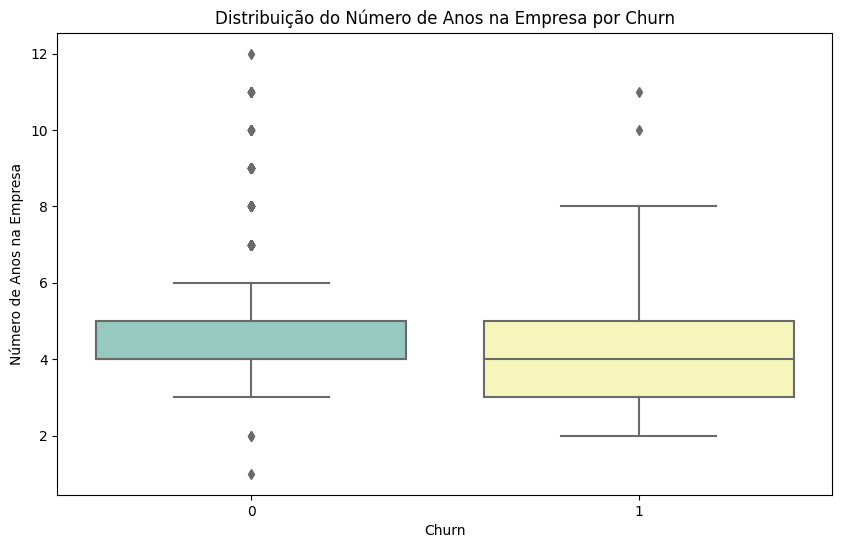

In [12]:
# Criando um gráfico de boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='num_years_antig', data=data, palette='Set3')
plt.xlabel('Churn')
plt.ylabel('Número de Anos na Empresa')
plt.title('Distribuição do Número de Anos na Empresa por Churn')
plt.show()

In [13]:
from imblearn.over_sampling import SMOTE
X = clientes_df.drop('churn', axis=1)  # Supondo que 'churn' seja a coluna de target
y = clientes_df['churn']

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [14]:
print(y_resampled.value_counts())
print(clientes_df['churn'].value_counts())

churn
0    12982
1    12982
Name: count, dtype: int64
churn
0    12982
1     1393
Name: count, dtype: int64


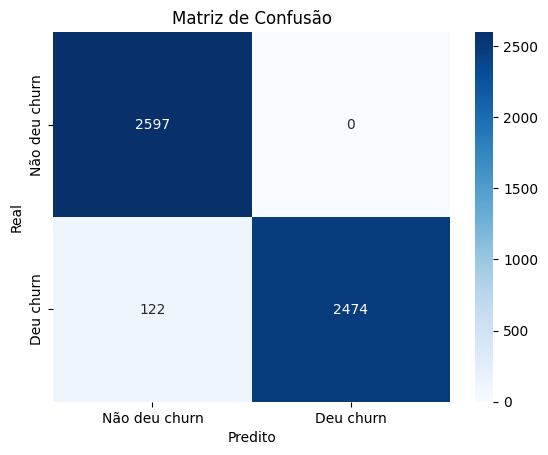

Acurácia: 0.9765068361255537

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2597
           1       1.00      0.95      0.98      2596

    accuracy                           0.98      5193
   macro avg       0.98      0.98      0.98      5193
weighted avg       0.98      0.98      0.98      5193



In [15]:
# Inicializar o modelo Random Forest
model = RandomForestClassifier(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o desempenho
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plotar a matriz de confusão
labels = ['Não deu churn', 'Deu churn']

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.ylabel('Real')
plt.show()

# Imprimir a acurácia e o relatório de classificação
print('Acurácia:', accuracy)
print('\nRelatório de Classificação:\n', class_report)

In [16]:
clientes_df['has_gas'] = clientes_df['has_gas'].replace({'t': 1, 'f': 0})
churn_X_gasto_anual = pd.merge(clientes_df, hist_churn_df, how='inner', on='id')
churn_X_gasto_anual
df_geral = pd.merge(churn_X_gasto_anual, precos_df, how='inner', on='id')


In [17]:
df_geral = pd.merge(churn_X_gasto_anual, precos_df, how='inner', on='id')
df_geral

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var_x,price_p2_var_x,price_p3_var_x,price_p1_fix_x,price_p2_fix_x,price_p3_fix_x,churn_x,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,churn_y,price_p1_var_y,price_p2_var_y,price_p3_var_y,price_p1_fix_y,price_p2_fix_y,price_p3_fix_y
0,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,21/08/2015,30/08/2022,21/08/2015,31/08/2021,51.544075,51.544075,1987.251454,189.95,0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.149934,0.000000,0.000000,44.315416,0.000000,0.000000,0,False,False,False,False,False,False,0,0.149934,0.000000,0.000000,44.315416,0.000000,0.000000
1,764c75f661154dac3a6c254cd082ea7d,544,0,0,16/04/2016,16/04/2022,16/04/2016,17/04/2021,51.544075,51.544075,1987.251454,47.96,0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,0,False,False,True,False,False,False,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
2,bba03439a292a1e166f80264c16191cb,1584,0,0,30/03/2016,30/03/2022,30/03/2016,31/03/2021,51.544075,51.544075,1987.251454,240.04,0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,0,False,False,False,True,False,False,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
3,149d57cf92fc41cf94415803a877cb4b,4425,0,526,13/01/2016,07/03/2022,13/01/2016,09/03/2021,123.459381,123.459381,2455.387129,445.75,526,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,0,False,False,False,False,False,False,0,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263
4,1aa498825382410b098937d65c4ec26d,8302,0,1998,09/12/2017,09/12/2022,01/11/2021,10/12/2021,290.100000,290.100000,1412.540000,796.94,1998,30.12,0.164775,0.086131,45.308378,0,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,0.168953,0.087632,0.000000,44.266930,0.000000,0.000000,1,False,False,False,False,False,True,1,0.168953,0.087632,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14370,18463073fb097fc0ac5d3e040f356987,32270,47940,0,24/05/2018,08/05/2022,08/05/2021,26/05/2020,51.544075,51.544075,1987.251454,4648.01,0,18.57,0.138305,0.000000,44.311378,1,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,0,False,False,True,False,False,False,0,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000
14371,d0a6f71671571ed83b2645d23af6de00,7223,0,181,27/08/2018,27/08/2022,27/08/2018,28/08/2021,68.640000,68.640000,1254.650000,631.69,181,144.03,0.100167,0.091892,58.995952,0,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418,1,False,False,True,False,False,False,1,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418
14372,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,08/02/2018,07/02/2022,08/02/2018,09/02/2021,76.354306,76.354306,2148.754683,190.39,179,129.60,0.116900,0.100015,40.606701,0,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosbouda

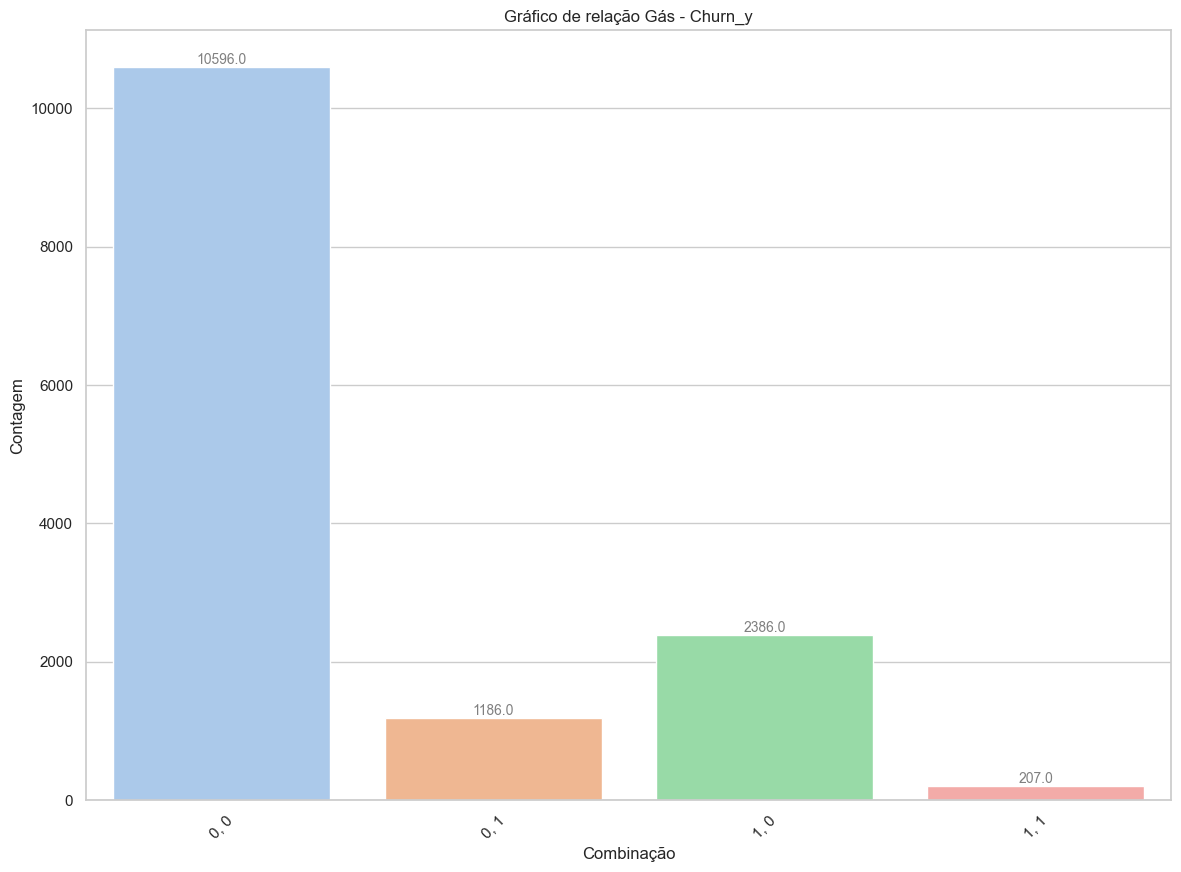

In [18]:


# Criar uma nova coluna para representar as categorias
df_geral['Combinação'] = df_geral.apply(lambda row: '1, 1' if row['has_gas'] and row['churn_y'] else
                                        '0, 0' if not row['has_gas'] and not row['churn_y'] else
                                        '0, 1' if not row['has_gas'] and row['churn_y'] else
                                        '1, 0', axis=1)

# Criar a matriz de contagem das categorias
crosstab_matrix = df_geral['Combinação'].value_counts().sort_index()

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(14, 10))
ax = sns.barplot(x=crosstab_matrix.index, y=crosstab_matrix.values, palette="pastel")
plt.xlabel('Combinação')
plt.ylabel('Contagem')
plt.title('Gráfico de relação Gás - Churn_y')
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

# Exibir o gráfico

plt.show()


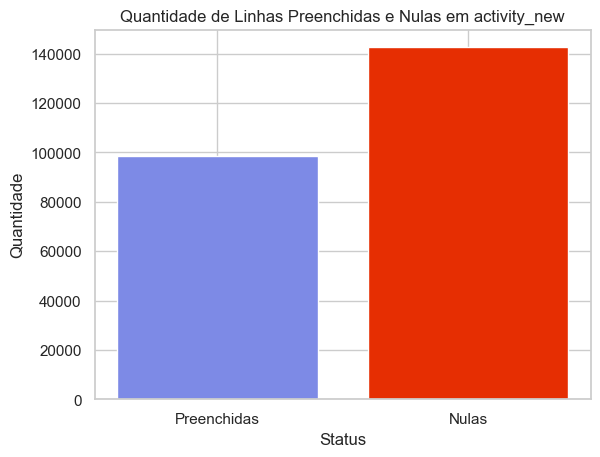

In [36]:


# Separar as linhas preenchidas e nulas
filled_values = primitiva_df[primitiva_df['activity_new'].notnull()]
null_values = primitiva_df[primitiva_df['activity_new'].isnull()]

# Definir as cores para as barras
colors = ['#7D8AE6', '#E62E02']

# Criar um gráfico de barras com cores diferentes
plt.bar(['Preenchidas', 'Nulas'], [len(filled_values), len(null_values)], color=colors)
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.title('Quantidade de Linhas Preenchidas e Nulas em activity_new')
plt.show()



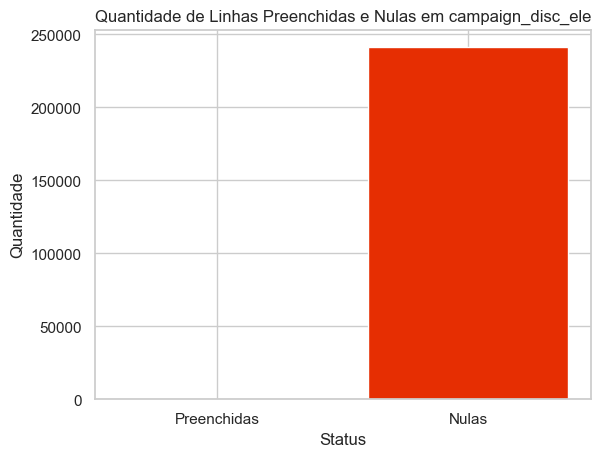

In [37]:


# Separar as linhas preenchidas e nulas
filled_values = primitiva_df[primitiva_df['campaign_disc_ele'].notnull()]
null_values = primitiva_df[primitiva_df['campaign_disc_ele'].isnull()]

# Definir as cores para as barras
colors = ['#7D8AE6', '#E62E02']

# Criar um gráfico de barras com cores diferentes
plt.bar(['Preenchidas', 'Nulas'], [len(filled_values), len(null_values)], color=colors)
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.title('Quantidade de Linhas Preenchidas e Nulas em campaign_disc_ele')
plt.show()


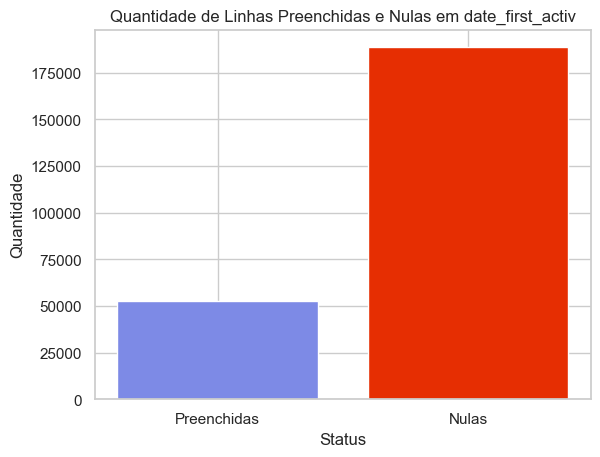

In [38]:


# Separar as linhas preenchidas e nulas
filled_values = primitiva_df[primitiva_df['date_first_activ'].notnull()]
null_values = primitiva_df[primitiva_df['date_first_activ'].isnull()]

# Definir as cores para as barras
colors = ['#7D8AE6', '#E62E02']

# Criar um gráfico de barras com cores diferentes
plt.bar(['Preenchidas', 'Nulas'], [len(filled_values), len(null_values)], color=colors)
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.title('Quantidade de Linhas Preenchidas e Nulas em date_first_activ')
plt.show()


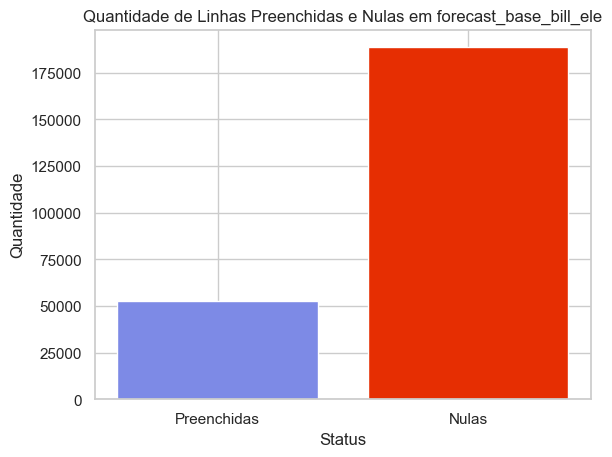

In [39]:
# Separar as linhas preenchidas e nulas
filled_values = primitiva_df[primitiva_df['forecast_base_bill_ele'].notnull()]
null_values = primitiva_df[primitiva_df['forecast_base_bill_ele'].isnull()]

# Definir as cores para as barras
colors = ['#7D8AE6', '#E62E02']

# Criar um gráfico de barras com cores diferentes
plt.bar(['Preenchidas', 'Nulas'], [len(filled_values), len(null_values)], color=colors)
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.title('Quantidade de Linhas Preenchidas e Nulas em forecast_base_bill_ele')
plt.show()

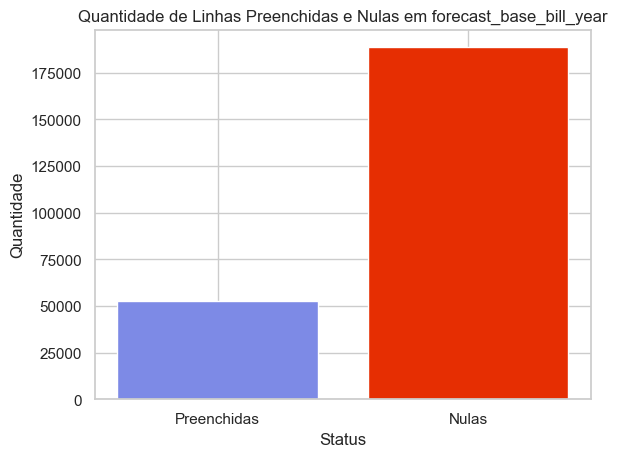

In [40]:


# Separar as linhas preenchidas e nulas
filled_values = primitiva_df[primitiva_df['forecast_base_bill_year'].notnull()]
null_values = primitiva_df[primitiva_df['forecast_base_bill_year'].isnull()]

# Definir as cores para as barras
colors = ['#7D8AE6', '#E62E02']

# Criar um gráfico de barras com cores diferentes
plt.bar(['Preenchidas', 'Nulas'], [len(filled_values), len(null_values)], color=colors)
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.title('Quantidade de Linhas Preenchidas e Nulas em forecast_base_bill_year')
plt.show()


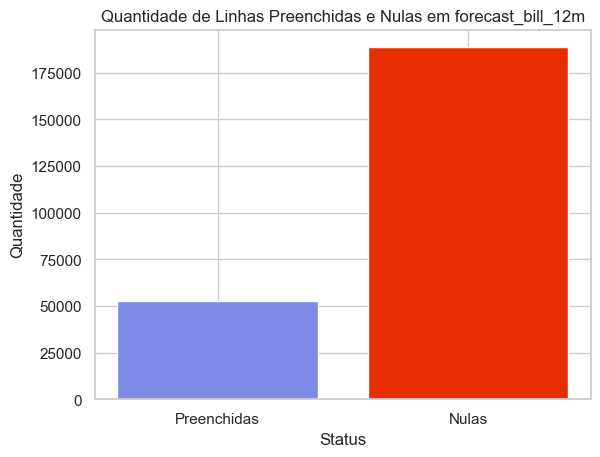

In [41]:


# Separar as linhas preenchidas e nulas
filled_values = primitiva_df[primitiva_df['forecast_bill_12m'].notnull()]
null_values = primitiva_df[primitiva_df['forecast_bill_12m'].isnull()]

# Definir as cores para as barras
colors = ['#7D8AE6', '#E62E02']

# Criar um gráfico de barras com cores diferentes
plt.bar(['Preenchidas', 'Nulas'], [len(filled_values), len(null_values)], color=colors)
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.title('Quantidade de Linhas Preenchidas e Nulas em forecast_bill_12m')
plt.show()


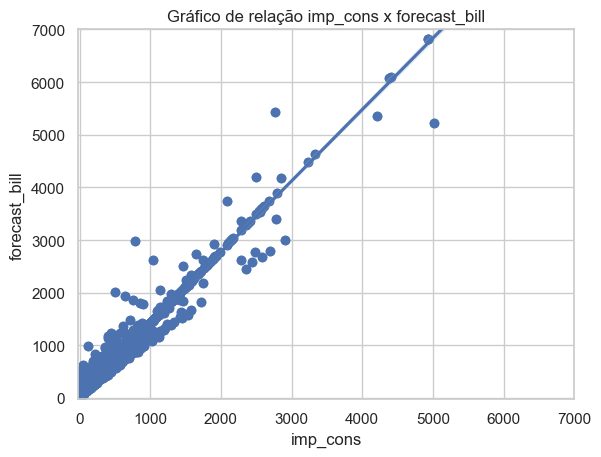

In [42]:
plt.scatter(df_geral['imp_cons'], df_geral['forecast_base_bill_ele'])
sns.regplot(x='imp_cons', y='forecast_base_bill_ele', data=df_geral)
plt.title('Gráfico de relação imp_cons x forecast_bill')
plt.xlabel('imp_cons')
plt.ylabel('forecast_bill')
plt.xlim(-20, 7000)
plt.ylim(-20, 7000)
plt.show()

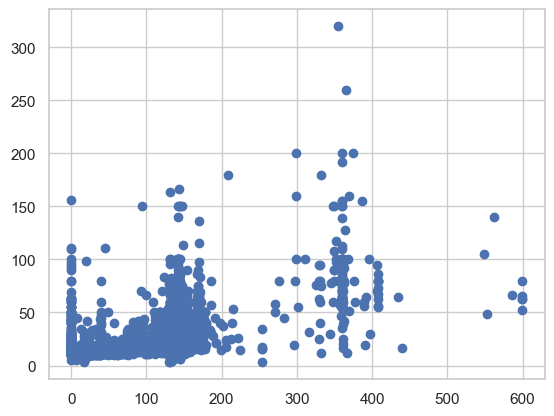

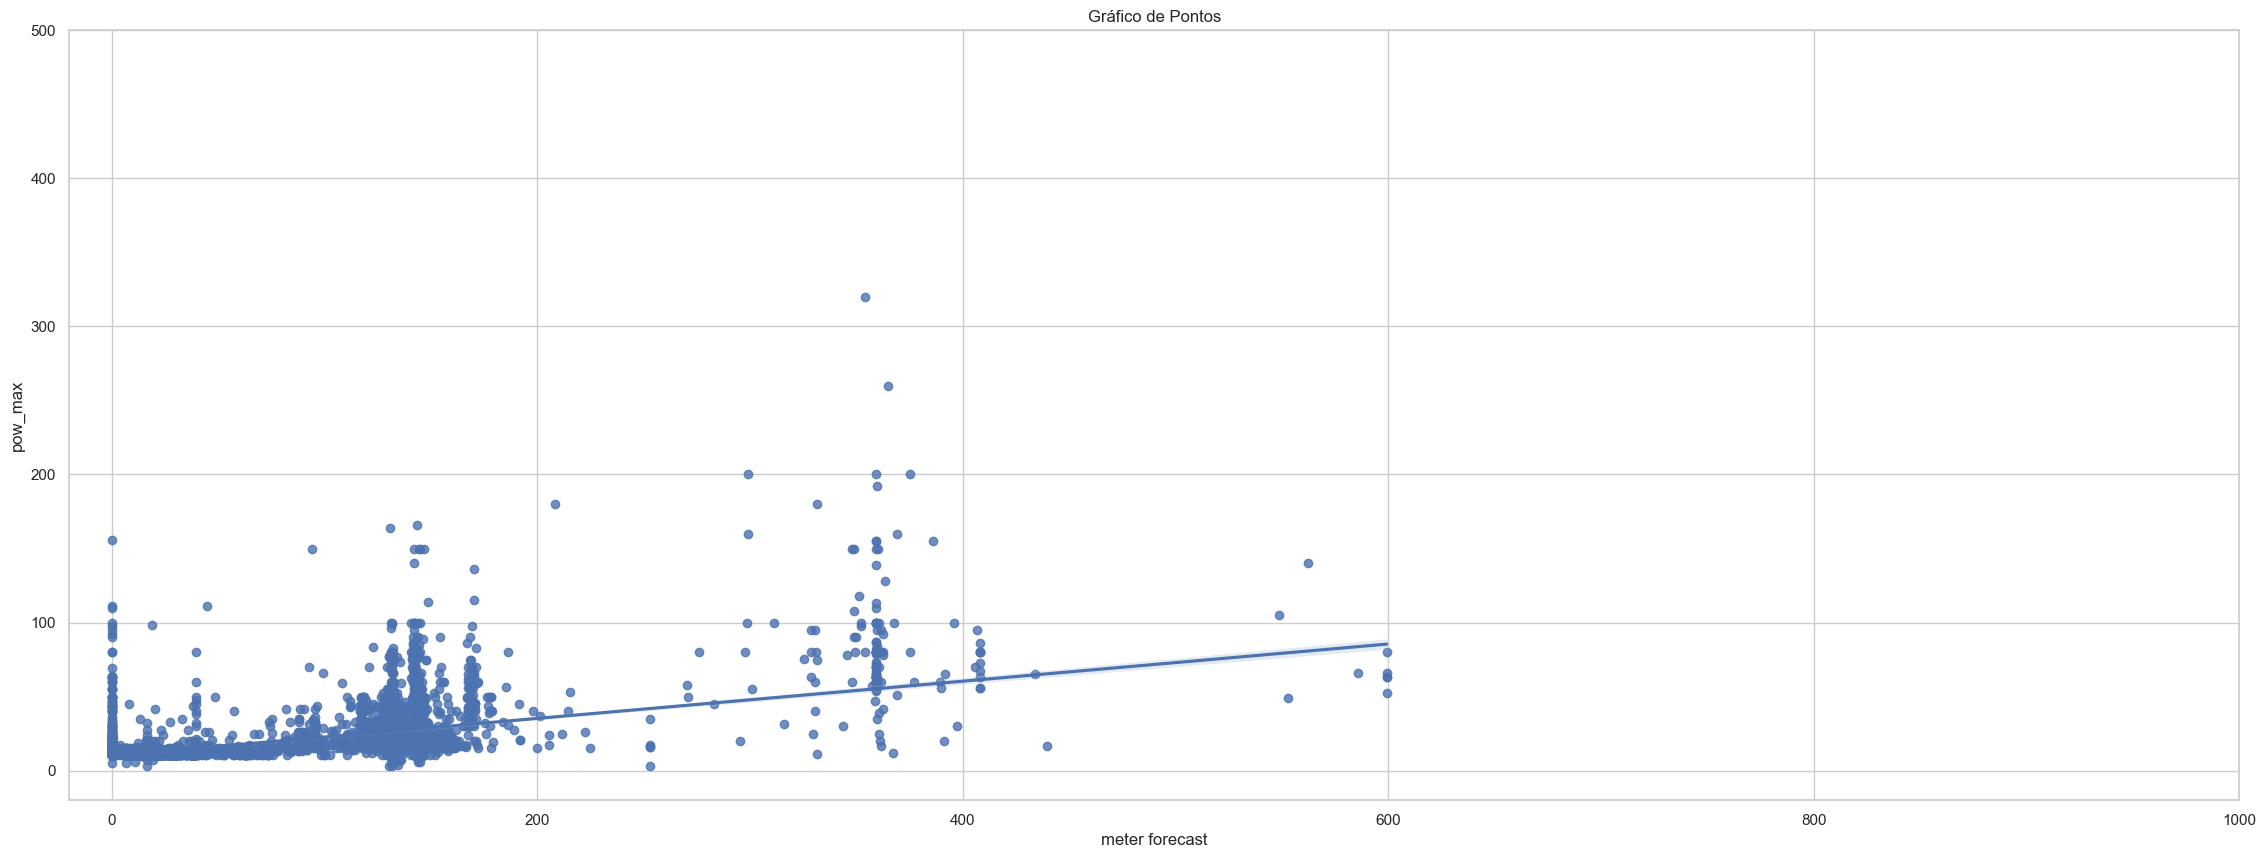

In [26]:
plt.scatter(churn_X_gasto_anual['forecast_meter_rent_12m'], churn_X_gasto_anual['pow_max'])
plt.figure(figsize=(28, 10))
sns.regplot(x='forecast_meter_rent_12m', y='pow_max', data=churn_X_gasto_anual)
plt.title('Gráfico de Pontos')
plt.xlabel('meter forecast')
plt.ylabel('pow_max')
plt.xlim(-20, 1000)
plt.ylim(-20, 500)
plt.show()
